In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

In [ ]:
mnist_train = pd.read_csv("train.csv")
mnist_test = pd.read_csv("test.csv")

In [ ]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
mnist_train.isna().any().any()

False

In [ ]:
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

IMAGE LABEL: 4


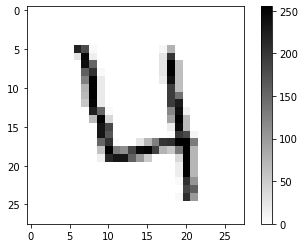

In [ ]:

digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array) 


image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

IMAGE LABEL: 0


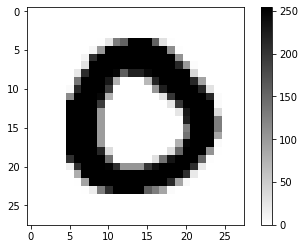

In [ ]:

digit_array = mnist_train.loc[4, "pixel0":]
arr = np.array(digit_array) 


image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[4, "label"]))

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


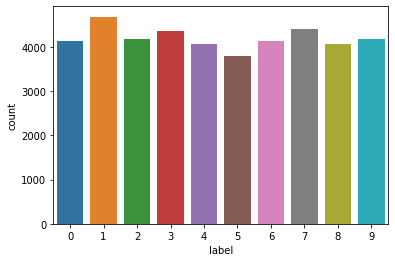

In [ ]:
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

In [ ]:
mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)

In [ ]:
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(42000, 28, 28, 1) (42000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape:", mnist_train_label.shape)

Shape: (42000, 10)


In [ ]:
def build_model(input_shape=(28, 28, 1)):
    model = Sequential()     
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape)) 
    model.add(BatchNormalization()) 
    model.add(Conv2D(32, kernel_size = 3, activation='relu')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax')) 
    return model 

In [ ]:
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
    
def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history 

In [ ]:
cnn_model = build_model((28, 28, 1)) 
compile_model(cnn_model, 'adam', 'categorical_crossentropy')


model_history = train_model(cnn_model, mnist_train_data, mnist_train_label, 50, 0.2)

Epoch 1/50
1050/1050 [==============================] - 162s 153ms/step - loss: 0.2499 - accuracy: 0.9238 - val_loss: 0.0516 - val_accuracy: 0.9826
Epoch 2/50
1050/1050 [==============================] - 166s 158ms/step - loss: 0.0827 - accuracy: 0.9740 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 3/50
1050/1050 [==============================] - 164s 156ms/step - loss: 0.0635 - accuracy: 0.9812 - val_loss: 0.0404 - val_accuracy: 0.9888
Epoch 4/50
1050/1050 [==============================] - 161s 153ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 5/50
1050/1050 [==============================] - 163s 156ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.0365 - val_accuracy: 0.9911
Epoch 6/50
1050/1050 [==============================] - 165s 157ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 7/50
1050/1050 [==============================] - 164s 156ms/step - loss: 0.0425 - accuracy: 0.9875 - val_

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       1

In [ ]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()

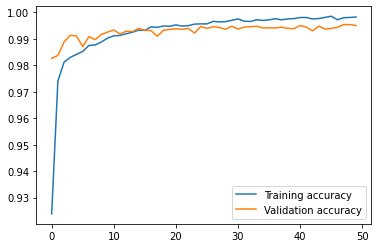

In [ ]:
plot_model_performance('accuracy', 'val_accuracy')

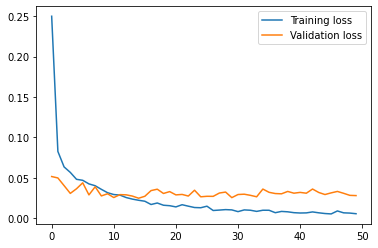

In [ ]:
plot_model_performance('loss', 'val_loss')

In [ ]:
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)
print(mnist_test_arr.shape)

(28000, 28, 28, 1)


In [ ]:
predictions = cnn_model.predict(mnist_test_arr)

875/875 [==============================] - 32s 36ms/step


In [ ]:
predictions

array([[2.10220161e-14, 4.15403142e-16, 9.99999940e-01, ...,
        4.25110468e-13, 1.56336820e-14, 3.29625216e-13],
       [9.99999940e-01, 1.19853615e-11, 1.48313209e-10, ...,
        2.00713682e-10, 2.72157626e-11, 9.21168142e-11],
       [2.03673688e-12, 4.03036181e-11, 1.67346117e-12, ...,
        1.56921993e-11, 7.88174907e-12, 9.99999940e-01],
       ...,
       [1.22228390e-16, 7.59731023e-14, 7.65870038e-16, ...,
        1.35742383e-13, 3.08576915e-14, 3.78966010e-13],
       [1.61316949e-11, 3.84672719e-12, 7.22961101e-12, ...,
        1.63698326e-11, 7.24472240e-13, 9.99999940e-01],
       [1.88000467e-13, 6.50105105e-14, 9.99999940e-01, ...,
        1.94506260e-12, 1.92374437e-12, 9.13104661e-13]], dtype=float32)

In [ ]:
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))

In [ ]:
predictions_test

In [ ]:
results = cnn_model.evaluate(mnist_test_arr, predictions, batch_size=128)

219/219 [==============================] - 25s 112ms/step - loss: 0.0052 - accuracy: 1.0000


In [ ]:
cnn_model.save("my_model")

In [ ]:
!zip -r /content/savedModel.zip /content/saved_model/

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_model/variables/variables.index (deflated 75%)
  adding: content/saved_model/saved_model.pb (deflated 90%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/keras_metadata.pb (deflated 94%)
